# 📦 Análise de Clientes de E-commerce

## 🎯 Objetivos do Projeto

O objetivo deste projeto é analisar os dados de clientes de uma empresa de e-commerce e construir um modelo preditivo capaz de estimar o valor que um cliente tende a gastar com base em características de seu comportamento, como:

- Tempo gasto no site da empresa;
- Tempo gasto no aplicativo móvel;
- Tempo gasto em ações de marketing por e-mail;
- Pertencimento ou não ao plano Premium.

A partir disso, busca-se:

- Entender os fatores que mais influenciam o gasto do cliente;
- Identificar possíveis oportunidades de negócio com base no perfil dos usuários;
- Construir modelos de Regressão para prever os gastos dos clientes;
- Avaliar o desempenho dos modelos utilizando métricas como RMSE e R².

Este projeto faz parte do portfólio de Ciência de Dados e tem como base o dataset disponível no Kaggle:  
🔗 [Ecommerce Customers Dataset](https://www.kaggle.com/datasets/srolka/ecommerce-customers)

# 1. BIBLIOTECAS:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 2. DATASET:

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

In [ ]:
# INFORMAÇÕES BÁSICAS DO DATASET:
print("INFORMAÇÕES BÁSICAS DO DATASET")
print("="*50)

print(f"\n Shape do dataset: {df.shape}")
print(f"   • {df.shape[0]} registros")
print(f"   • {df.shape[1]} colunas")

print(f"\n Tipos de dados:")
print(df.dtypes)

print(f"\n Informações gerais:")
print(df.info())

print(f"\n Estatísticas descritivas:")
print(df.describe())

print(f"\n Valores nulos por coluna:")
print(df.isnull().sum())

## 🔍 Inspeção Inicial dos Dados:

Nesta etapa, realizamos uma inspeção preliminar do dataset para compreender sua estrutura e características básicas. As principais ações executadas foram:

- Visualização das primeiras linhas do dataset;
- Verificação do número de registros e colunas (`shape`);
- Consulta aos tipos de dados de cada coluna;
- Avaliação da existência de valores ausentes;
- Geração de estatísticas descritivas para as variáveis numéricas.

A partir dessa análise inicial, observamos que:

- O dataset contém **500 registros** e **8 colunas**;
- Não há **valores ausentes**;
- A maioria das colunas é composta por variáveis **numéricas contínuas** (`float64`);
- As colunas `Email`, `Address` e `Avatar` são do tipo `object` e não possuem valor analítico direto para um modelo preditivo;
- A variável **alvo** para o problema de regressão é `Yearly Amount Spent`, que representa o valor anual gasto por um cliente.

Essas informações guiam as próximas etapas de análise exploratória e seleção de variáveis relevantes para o modelo.

# 3. ANÁLISE EXPLORATÓRIA DE DADOS (EDA):

## 3.1. DISTRIBUIÇÃO DO GASTO ANUAL POR CLIENTE (TARGET):

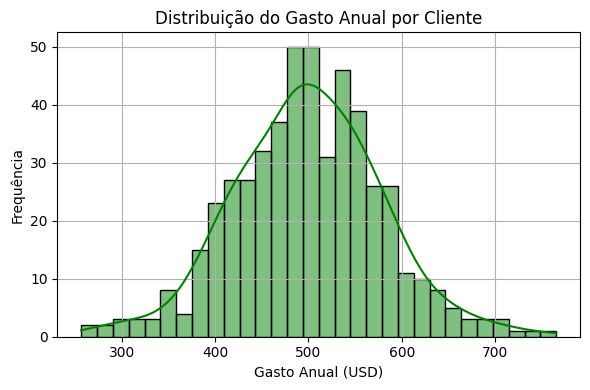

In [10]:
# HISTOGRAMA DO GASTO ANUAL POR CLIENTE:
plt.figure(figsize=(6, 4))
sns.histplot(df['Yearly Amount Spent'], kde=True, color='green', bins=30)
plt.title('Distribuição do Gasto Anual por Cliente')
plt.xlabel('Gasto Anual (USD)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

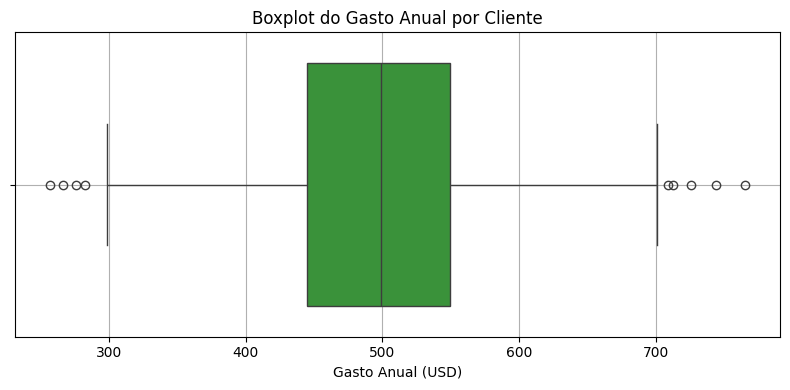

In [11]:
# BOXPLOT DO GASTO ANUAL:

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Yearly Amount Spent'], color='#2ca02c')
plt.title('Boxplot do Gasto Anual por Cliente')
plt.xlabel('Gasto Anual (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()